## A quick approach to time series analysis with python

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime


In [132]:
# current_dir = os.path.dirname(__file__) if not in jupyter
current_dir = os.getcwd()
path_to_dataset = os.path.join(current_dir, os.path.pardir,'2023.parquet')

In [133]:
raw_df = pd.read_parquet(path_to_dataset)
raw_df.head()

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
0,AIMST,0.006284,Aldovia,2.0,1.0,0.045455,NaN,NaN,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.008092,NaN
1,AIMST,0.123459,Aldovia,3.0,1.0,0.090909,NaN,NaN,0.0,0.0,4,4,5,5,4,2013-01-03,2,20,0.008092,NaN
2,AIMST,0.055607,Aldovia,4.0,1.0,0.136364,NaN,NaN,0.0,2.0,4,4,5,5,4,2013-01-04,3,19,0.008092,NaN
3,AIMST,0.032148,Aldovia,0.0,1.0,0.181818,NaN,NaN,2.0,0.0,4,4,5,5,4,2013-01-07,4,18,0.008092,NaN
4,AIMST,0.097054,Aldovia,1.0,1.0,0.227273,NaN,NaN,0.0,0.0,4,4,5,5,4,2013-01-08,5,17,0.008092,NaN


### Quick dataset inspection

In [134]:
raw_df.columns.unique()

Index(['brand', 'phase', 'country', 'dayweek', 'month', 'wd_perc', 'ther_area',
       'hospital_rate', 'n_nwd_bef', 'n_nwd_aft', 'n_weekday_0', 'n_weekday_1',
       'n_weekday_2', 'n_weekday_3', 'n_weekday_4', 'date', 'wd', 'wd_left',
       'monthly', 'main_channel'],
      dtype='object')

In [135]:
raw_df.brand.unique()

array(['AIMST', 'AITPJ', 'AIZTT', 'AMOKR', 'BELQI', 'BNCPE', 'BQSIJ',
       'BRQJC', 'BUMTY', 'CCXTL', 'CDFFX', 'CQSEZ', 'DDRNC', 'DKGUK',
       'DKNSS', 'DLOBM', 'DRGNL', 'DXGSD', 'EAHGQ', 'EQZWB', 'ESVUF',
       'EUESX', 'EUJWP', 'FIPNP', 'FLGPE', 'FNHPF', 'FUYDW', 'GBWHQ',
       'GIKKL', 'GUCEF', 'GYMRM', 'HGSMA', 'HGXNC', 'HHBXR', 'HIBSM',
       'HJDCK', 'HOIWJ', 'HPCEJ', 'HZCGL', 'ICPTW', 'IDMBR', 'IKGEA',
       'IMUFR', 'IMVCZ', 'IYPIH', 'JAZVP', 'JJVUD', 'JQKXY', 'JTOEV',
       'KGUIR', 'KKZMZ', 'KMXBC', 'LCXHV', 'LFJNN', 'LGFTN', 'LIIDH',
       'LRHOW', 'LTOHO', 'MLKJM', 'MRHKP', 'NXPMK', 'OLVUY', 'OPRCW',
       'ORUVA', 'PEPBY', 'PIIFS', 'PJZBL', 'PLNDT', 'PMTEA', 'PRPVG',
       'PUHXP', 'QGTFP', 'QQPNT', 'QRLJM', 'QSNYX', 'QYGNN', 'QYPXJ',
       'RBBLK', 'RHXQH', 'RRGHZ', 'RUJHO', 'RWUKW', 'RXRWV', 'RYZCA',
       'SOXJL', 'SXOQX', 'TOJGV', 'TXYQX', 'UPRUW', 'UWEVE', 'UXMKF',
       'UYELK', 'VCWIO', 'VDVBR', 'VKOXM', 'VXLPO', 'WFGXK', 'WOXYE',
       'WUOIM', 'XML

In [136]:
nans= raw_df.isna().sum()
nans

brand                 0
phase                 0
country               0
dayweek               0
month                 0
wd_perc               0
ther_area        356445
hospital_rate    504994
n_nwd_bef             0
n_nwd_aft             0
n_weekday_0           0
n_weekday_1           0
n_weekday_2           0
n_weekday_3           0
n_weekday_4           0
date                  0
wd                    0
wd_left               0
monthly               0
main_channel     504994
dtype: int64

In [137]:
len(raw_df)

2812490

In [138]:
# ara vaig a crear el Data_Range, que serà el index per les nostres ts.
date_range = pd.date_range(start = raw_df.date.min(), end=raw_df.date.max(),freq='B') # B? --> https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases

In [139]:
date_range

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
               '2013-01-11', '2013-01-14',
               ...
               '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
               '2021-12-24', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=2349, freq='B')

### Basic experiment.

##### Objective: Perform a month forecasting for all country-brand pairs with our clustering idea.

In [140]:
df = raw_df.drop(columns=['dayweek', 'month', 'wd_perc', 'ther_area',
       'hospital_rate', 'n_nwd_bef', 'n_nwd_aft', 'n_weekday_0', 'n_weekday_1',
       'n_weekday_2', 'n_weekday_3', 'n_weekday_4', 'wd', 'wd_left',
       'monthly', 'main_channel']) # case specific, I'll rely only on the phasing shape to forecast the future, not any dimension/field/whatever.

In [141]:
##### df single trend visualization.

time_serie = df[(df.brand == 'AIMST')&(df.country== 'Aldovia')]
time_serie = time_serie.set_index('date')
time_serie = time_serie.reindex(date_range, fill_value=np.nan) # tenim el date_range amb totes les datas. Això ho faig per estandaritzar el x axis a totes les ts en un futur.
time_serie

,brand,phase,country
2013-01-01,NaN,NaN,NaN
2013-01-02,AIMST,0.006284,Aldovia
2013-01-03,AIMST,0.123459,Aldovia
2013-01-04,AIMST,0.055607,Aldovia
2013-01-07,AIMST,0.032148,Aldovia
...,...,...,...
2021-12-27,AIMST,0.029592,Aldovia
2021-12-28,AIMST,0.042513,Aldovia
2021-12-29,AIMST,0.011557,Aldovia
2021-12-30,AIMST,0.000000,Aldovia


<class 'pandas.core.series.Series'>


<Axes: >

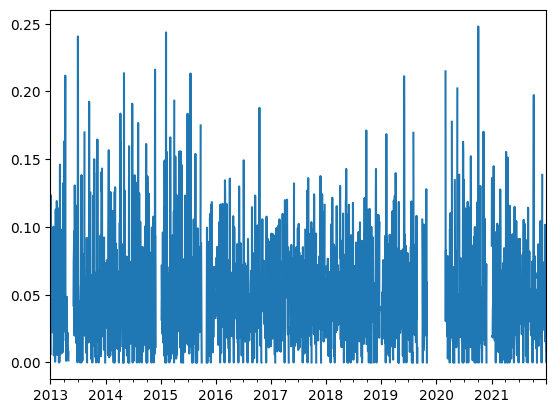

In [142]:
print(type(time_serie.phase)) # tenir el datatype com a pandas.Series es el millor per treballar en time series
time_serie.phase.plot()

Code chunk 

In [143]:
all_ts = [date_range]
# el primer value seran els indexes, així podem currar per la resta amb arrays i fer pd.Series(data=all_ts[N],index = all_ts[0])
for country in df.country.unique()[:10]: # pillo els primers 10 pars només per tema que no em tardi la vida
    for brand in df.brand.unique()[:10]:
        ts = df[(df.brand == brand)&(df.country== country)]
        if not ts.empty:
            ts = ts.set_index('date')
            ts = ts.reindex(date_range, fill_value=np.nan)
            all_ts.append(ts.phase.values) # el .values fa que sigui np.array 
#comentari --> aixo tarda molt, complexitat N brands x M countries. Podriem definir només les tuplas existents i iterar només sobre elles.       

In [146]:
# Pivot the DataFrame to have dates as index and (country, brand) pairs as columns
df_pivot = df.pivot_table(values='phase', index='date', columns=['country', 'brand'])

# Reindex to include all dates in date_range
df_pivot = df_pivot.reindex(date_range, fill_value=np.nan)

# Convert the pivoted data to a list
all_ts2 = [date_range] + [df_pivot[col].values for col in df_pivot.columns]

df_pivot

country      Aldovia                                                      \
brand          AIMST     AITPJ     AIZTT     AMOKR BELQI     BNCPE BQSIJ   
2013-01-01       NaN       NaN       NaN       NaN   NaN       NaN   NaN   
2013-01-02  0.006284       NaN  0.020056       NaN   NaN       NaN   NaN   
2013-01-03  0.123459       NaN  0.050141       NaN   NaN       NaN   NaN   
2013-01-04  0.055607       NaN  0.030084       NaN   NaN       NaN   NaN   
2013-01-07  0.032148       NaN  0.023644       NaN   NaN       NaN   NaN   
...              ...       ...       ...       ...   ...       ...   ...   
2021-12-27  0.029592  0.001560       NaN  0.000000   NaN  0.000000   NaN   
2021-12-28  0.042513  0.031223       NaN  0.024235   NaN  0.046819   NaN   
2021-12-29  0.011557  0.001886       NaN  0.000000   NaN  0.000000   NaN   
2021-12-30  0.000000  0.000000       NaN  0.000000   NaN  0.000000   NaN   
2021-12-31  0.000000  0.000000       NaN  0.000000   NaN  0.000000   NaN   

country                               ...   Zamunda                            \
brand      BRQJC     BUMTY     CCXTL  ...     XLTUE     XMLDV XUJGO     YOWYI   
2013-01-01   NaN       NaN       NaN  ...       NaN       NaN   NaN       NaN   
2013-01-02   NaN  0.000000  0.003549  ...  0.000000       NaN   NaN       NaN   
2013-01-03   NaN  0.198866  0.118722  ...  0.000000       NaN   NaN       NaN   
2013-01-04   NaN  0.050842  0.106291  ...  0.072776       NaN   NaN       NaN   
2013-01-07   NaN  0.021653  0.035431  ...  0.180078       NaN   NaN       NaN   
...          ...       ...       ...  ...       ...       ...   ...       ...   
2021-12-27   NaN       NaN       NaN  ...       NaN  0.045743   NaN  0.000000   
2021-12-28   NaN       NaN       NaN  ...       NaN  0.003896   NaN  0.022100   
2021-12-29   NaN       NaN       NaN  ...       NaN  0.000000   NaN  0.110526   
2021-12-30   NaN       NaN       NaN  ...       NaN  0.000000   NaN  0.000000   
2021-12-31   NaN       NaN       NaN  ...       NaN       NaN   NaN       NaN   

country                                                         
brand      ZAKZS     ZHQFB     ZKKLD ZKMVW     ZNDRT     ZVLFE  
2013-01-01   NaN       NaN       NaN   NaN       NaN       NaN  
2013-01-02   NaN       NaN       NaN   NaN  0.000000  0.000000  
2013-01-03   NaN       NaN       NaN   NaN  0.000000  0.005328  
2013-01-04   NaN       NaN       NaN   NaN  0.010346  0.068923  
2013-01-07   NaN       NaN       NaN   NaN  0.020692  0.042677  
...          ...       ...       ...   ...       ...       ...  
2021-12-27   NaN  0.068923  0.033827   NaN       NaN       NaN  
2021-12-28   NaN  0.023029  0.005815   NaN       NaN       NaN  
2021-12-29   NaN  0.000000  0.000013   NaN       NaN       NaN  
2021-12-30   NaN  0.000000  0.000000   NaN       NaN       NaN  
2021-12-31   NaN       NaN       NaN   NaN       NaN       NaN  

[2349 rows x 2684 columns]

In [128]:
import pandas as pd

# Assuming all_ts[1] and all_ts2[1] are iterable and of the same length
df = pd.DataFrame({
    'A': all_ts[11],
    'B': all_ts2[11]
})

df['C'] = (df['A'] == df['B']) | (df['A'].isna() & df['B'].isna())

# Display the DataFrame
print(df)

             A         B      C
0          NaN       NaN   True
1          NaN  0.000326  False
2          NaN  0.117168  False
3          NaN  0.026675  False
4          NaN  0.016799  False
...        ...       ...    ...
2344  0.001358       NaN  False
2345  0.024062       NaN  False
2346  0.009298       NaN  False
2347  0.000000       NaN  False
2348  0.000000       NaN  False

[2349 rows x 3 columns]


In [129]:
import numpy as np

# Define the range of indices
max_index = 56

# Pad all_ts2 and all_ts with None to ensure they have at least 57 elements
all_ts2_padded = all_ts2 + [None] * (max_index + 1 - len(all_ts2))
all_ts_padded = all_ts + [None] * (max_index + 1 - len(all_ts))

# Create the equality array using list comprehension
equality_array = np.array([
    np.array_equal(a, b, equal_nan=True) if a is not None and b is not None else False
    for a, b in zip(all_ts2_padded, all_ts_padded)
])

print(equality_array)

[ True  True  True  True  True  True  True  True  True  True  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False]


<Axes: >

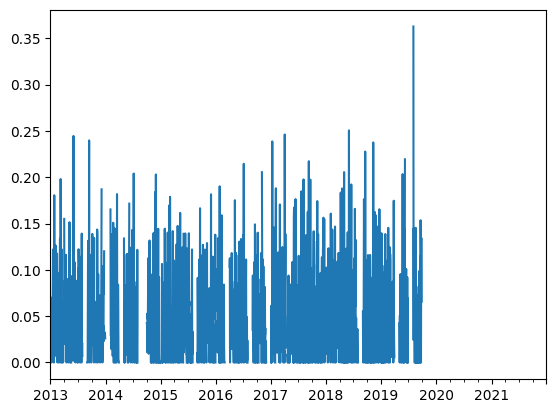

In [112]:
pd.Series(data=all_ts2[3],index=all_ts2[0]).plot() # simplement canviant el index de all_ts[3 --> N] mires el que vols.

Em vaig a fer un cursillo de xgboost, dealea ell sol amb els empty values.